## Method

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine      Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## All imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Set the path to housing csv file
housing = pd.read_csv(r'housing.csv')

In [3]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

#### Storing the data in the way we want it


In [4]:
# With dummy varible convert column 'ocean_proximity' into float64 values.
ocean_proximity_matrix = pd.get_dummies(pd.Series(housing["ocean_proximity"]), dtype=float)
ocean_proximity_matrix

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [5]:
# Remove cloumn 'ocean_proximity' with object values and join the new matrix where 'ocean_proximity'
# has been converted to float46-values thanks to get_dummies() function in pandas.
housing_modified = housing.copy()
housing_modified = housing_modified.drop('ocean_proximity', axis=1)
housing_modified_ocean = pd.concat([housing_modified, ocean_proximity_matrix], axis=1)
housing_modified_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [6]:
X = housing_modified_ocean.copy() 
X.drop(columns = ['median_house_value'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [28]:
y = housing_modified_ocean['median_house_value'].copy()
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [9]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  float64
 10  INLAND              20640 non-null  float64
 11  ISLAND              20640 non-null  float64
 12  NEAR BAY            20640 non-null  float64
 13  NEAR OCEAN          20640 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# EDA
-- Describe why we do this

In [13]:
# Overview of the data
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
# Display information about housing data.
# "We found that the data has missing values in the column 'total_bedrooms'"
# Drop null data, as it is 1%.....
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


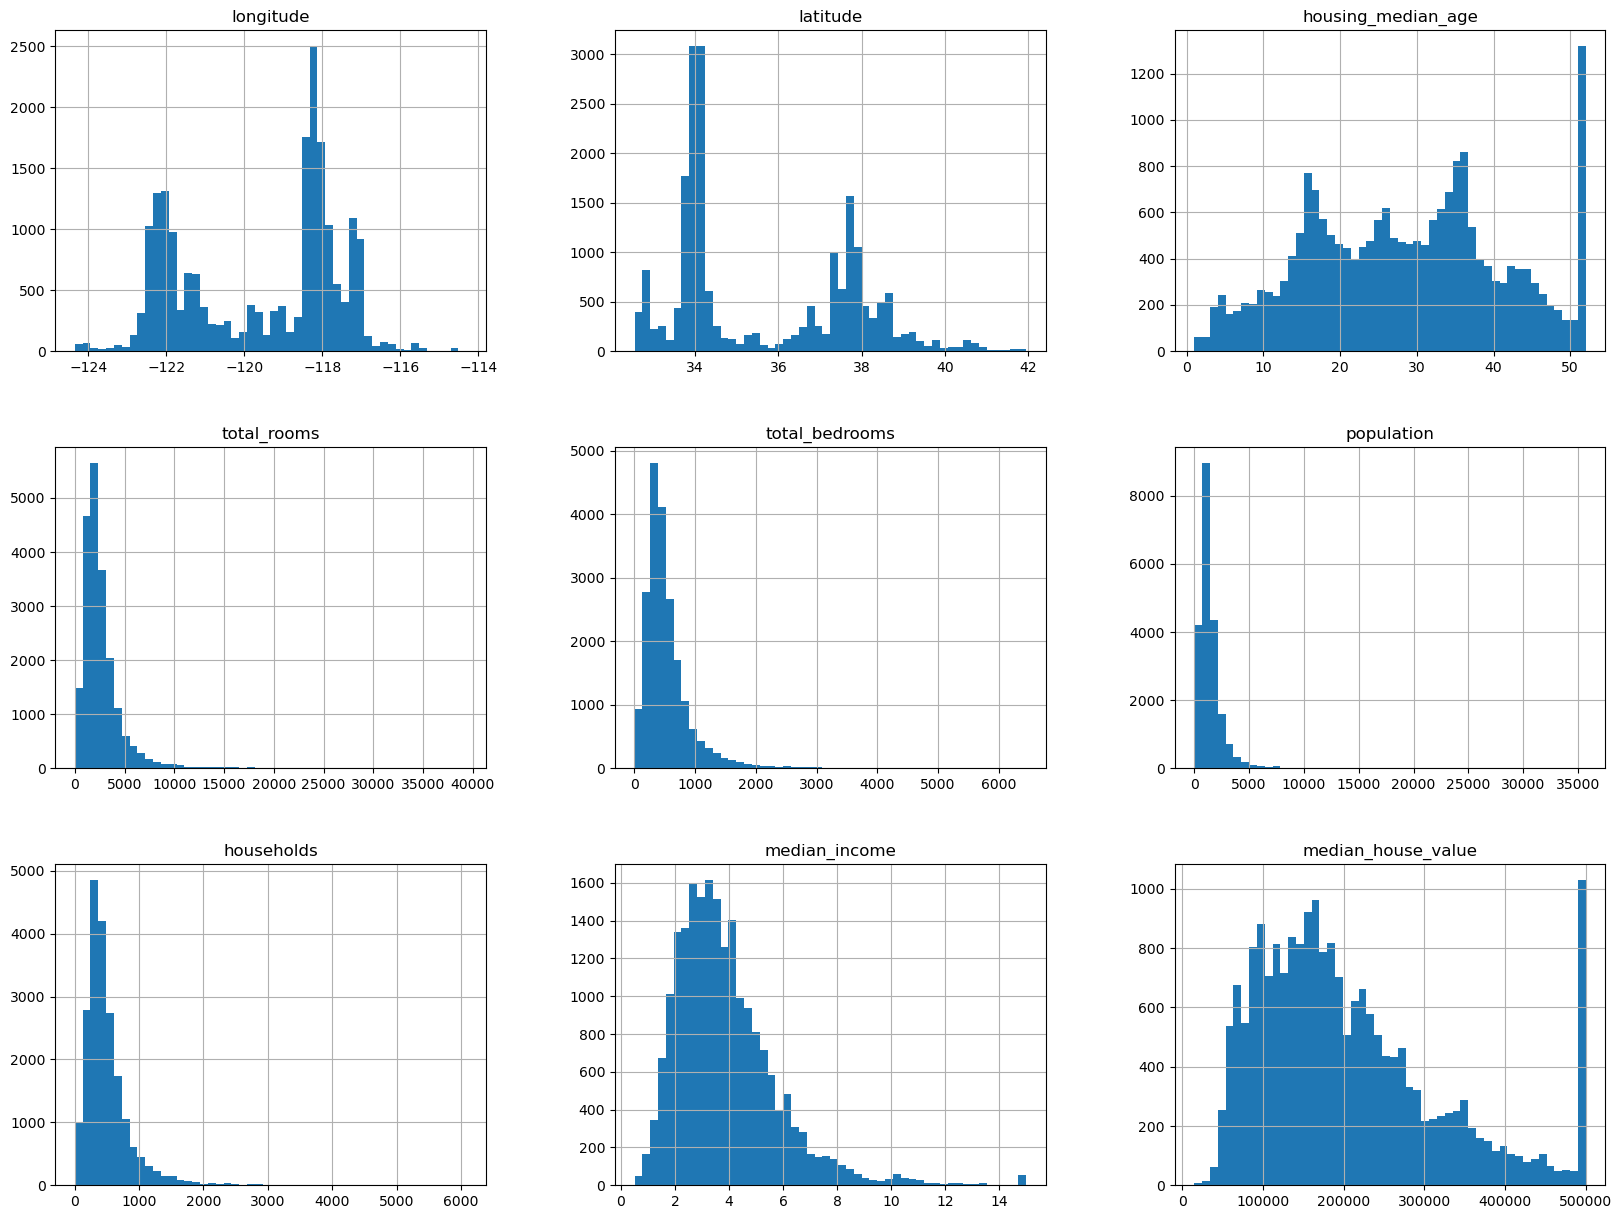

In [15]:
# Why??
housing.hist(bins=50, figsize=(20, 15))
print()

In [16]:
housing_modified_ocean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


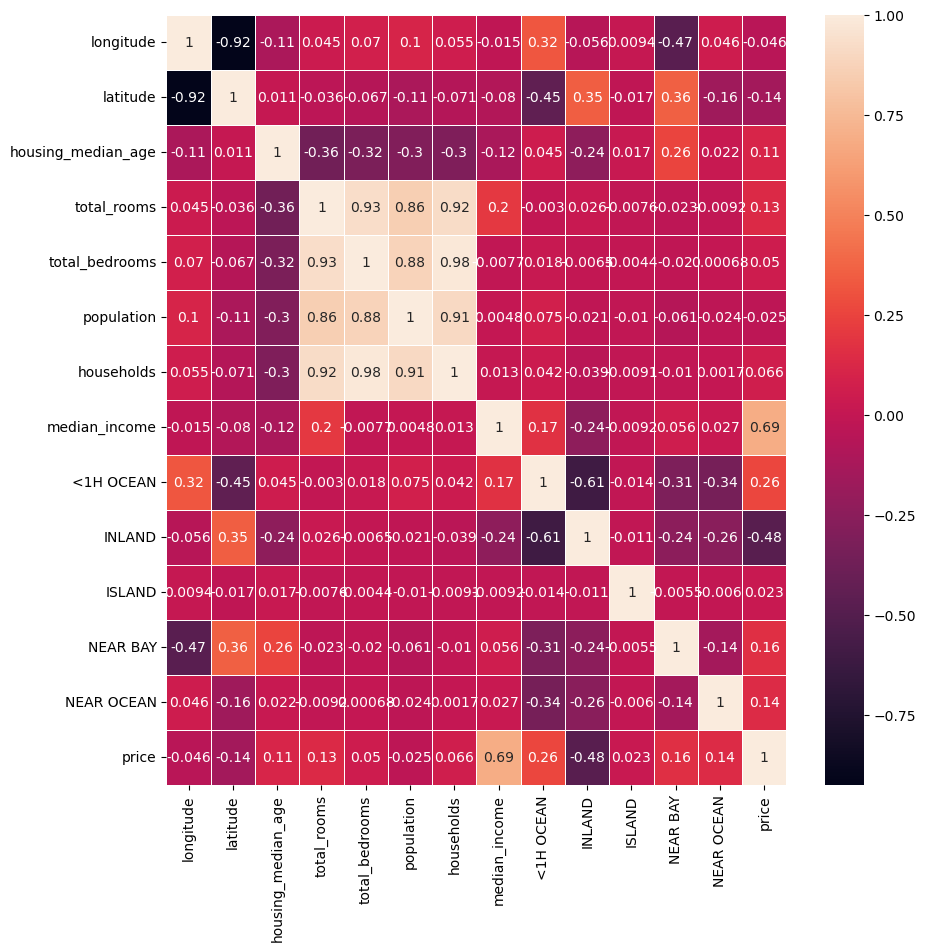

In [17]:
# Placing all the data in "df" so I can make a nice correlation plot
df = housing_modified_ocean.copy()
df["price"] = housing_modified_ocean['median_house_value']
df.drop(columns=['median_house_value'], inplace=True)

correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))   
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

C:\Users\olsso\AppData\Local\Temp\ipykernel_10596\318752960.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


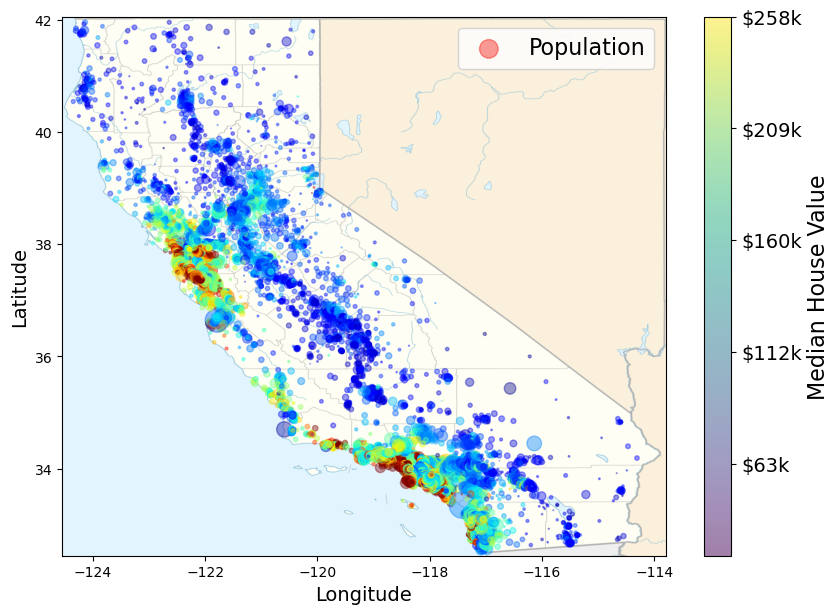

In [18]:
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.set_label('Median House Value', fontsize=16)
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


plt.legend(fontsize=16)
plt.show()

 The correlation coefficient between median house value and median income is 0.6881


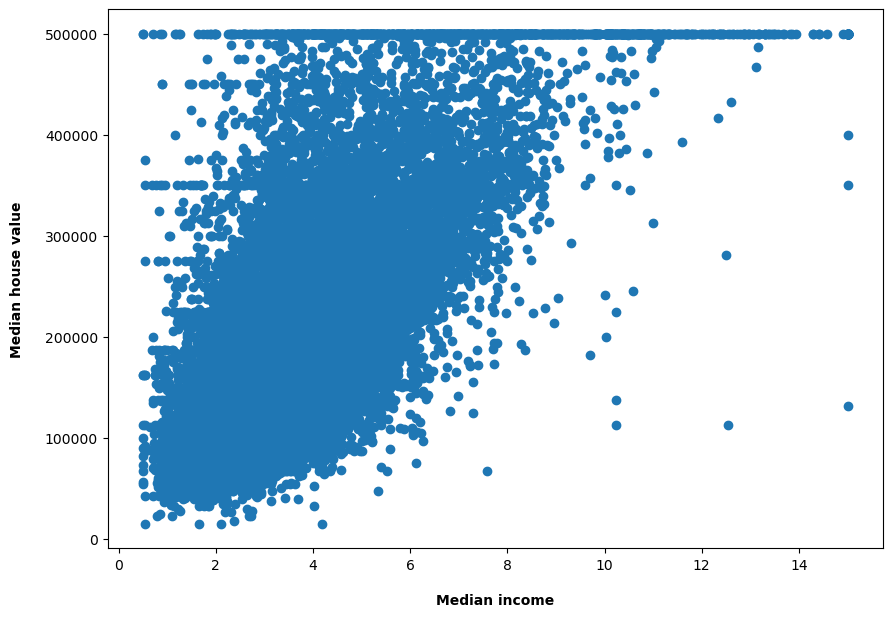

In [19]:
# Modellen kan inte predikta över 500 000, linjen längst upp...

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(housing['median_income'], housing['median_house_value'], alpha=1)
ax.set_ylabel('Median house value', labelpad=15, fontweight='bold')
ax.set_xlabel('Median income', labelpad=15, fontweight='bold')
 
correlation = np.corrcoef(housing['median_income'], housing['median_house_value'])
print(f' The correlation coefficient between median house value and median income is {round(correlation[1][0], 4)}')

 The correlation coefficient between median house value and total rooms is 0.1342


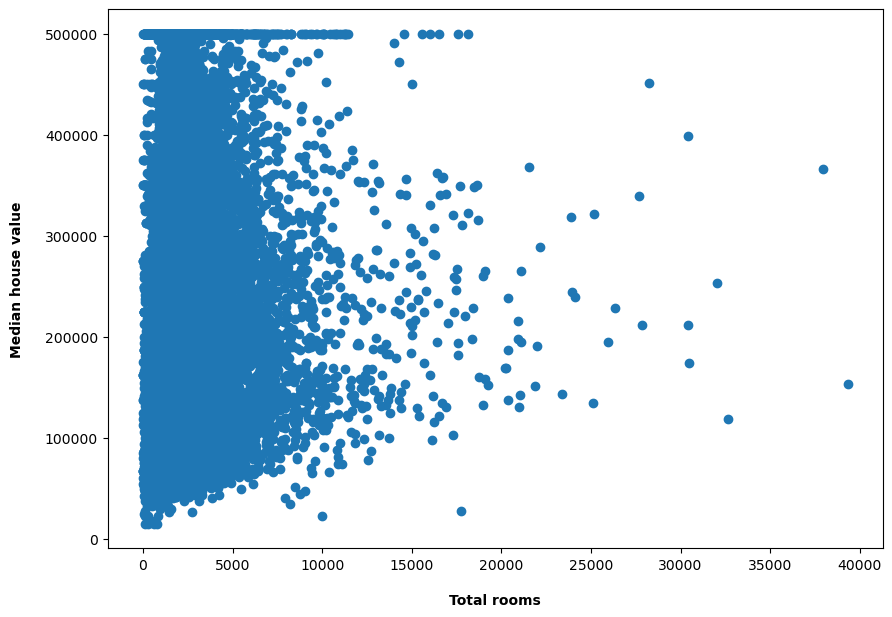

In [20]:
# Modellen kan inte predikta över 500 000, linjen längst upp...

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(housing['total_rooms'], housing['median_house_value'], alpha=1)
ax.set_ylabel('Median house value', labelpad=15, fontweight='bold')
ax.set_xlabel('Total rooms', labelpad=15, fontweight='bold')
 
correlation = np.corrcoef(housing['total_rooms'], housing['median_house_value'])
print(f' The correlation coefficient between median house value and total rooms is {round(correlation[1][0], 4)}')

## Model Selection

1. Linear Regression 
2. Lasso 
3. Random Forest Regression
4. Beslutsträd
5. SVM
6. Extra Tree

In [22]:
lin_reg = LinearRegression()

scores_lr = cross_validate(lin_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lr))
print('RMSE:', np.sqrt(np.mean(-scores_lr)))

RMSE for each iteration: [4.06261191e-10 1.65441550e-10 1.47452600e-10]
RMSE: 2.6718366414032545e-10


In [24]:
lasso = Lasso()
hyper_param_lasso = {'alpha':(0.01, 1, 2, 5, 10)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
lasso_reg.fit(X_train_scaled, y_train) 

print(lasso_reg.best_params_) 

scores_lasso = cross_validate(lasso_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]

print('RMSE for each iteration:', np.sqrt(-scores_lasso))

print('RMSE:', np.sqrt(np.mean(-scores_lasso)))

{'alpha': 5}
RMSE for each iteration: [8.13103578 4.91213068 6.70501248]
RMSE: 6.71317021654933


In [29]:
forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 10],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv= 5)
forest_reg.fit(X_train_scaled, y_train)

print(forest_reg.best_params_)

scores_forest = cross_validate(forest_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_forest))
print('RMSE:', np.sqrt(np.mean(-scores_forest)))

C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

KeyboardInterrupt: 